# Problem Set 2 - Biometry Strikes Back
This is a problem set so you can work with your colleagues or use any other sources. Please do not hand in copies of each other’s papers however. Please interpret and write up alone.

## More Regression

1. Inbreeding coefficient measures the deviation from Hardy-Weinberg expectations within populations. Various demographic factors can influence the amount of inbreeding (deviation from HW) builds up in a population. I simulated a range of these demographic scenarios and summarized them in the following problem.

    Take the data in ’F.dat’ This file contains values of the inbreeding coefficient, F, in 10 treatments that vary along a continuous scale. These 10 treatments were simulated for 100 generations and the simulations replicated 100 times. There are four variables: avgF, it (replicate), gen (generation), NeSc (predicted change in Effective population size due to management), and obs (just the observation number)
    
    Test the hypothesis that NeSc influences avgF. You will have to consider time as well, because avgF always increases over time. Multiple regression is a convenient way to achieve this end. Make sure to give parameter estimates.
    
    This one is going to require that you deal with residual variance issues by variance modeling using the techniques we learned in class. Showing how the two predictors affect the residuals after an initial fit should give you insight into what approach you might use (plot residuals as Y and either of the predictors as X).

__ANSWER:__ *NeSc negatively influences avgF. It can also be said that avgF increases over time*

In [1]:
fdat = read.table('F.dat')
head(fdat)
summary(fdat)

NeSc,gen,it,avgF
<dbl>,<int>,<int>,<dbl>
0.0429772,10,1,0.0006233371
0.0429772,20,1,0.0021460771
0.0429772,30,1,0.0035422802
0.0429772,40,1,-0.0015178184
0.0429772,50,1,0.0088235291
0.0429772,60,1,0.0133539448


      NeSc                gen            it              avgF          
 Min.   :-0.320128   Min.   : 10   Min.   :  1.00   Min.   :-0.007388  
 1st Qu.:-0.039768   1st Qu.: 30   1st Qu.: 25.75   1st Qu.: 0.002633  
 Median : 0.036382   Median : 55   Median : 50.50   Median : 0.006503  
 Mean   : 0.006232   Mean   : 55   Mean   : 50.50   Mean   : 0.007859  
 3rd Qu.: 0.056868   3rd Qu.: 80   3rd Qu.: 75.25   3rd Qu.: 0.011433  
 Max.   : 0.200553   Max.   :100   Max.   :100.00   Max.   : 0.063264  

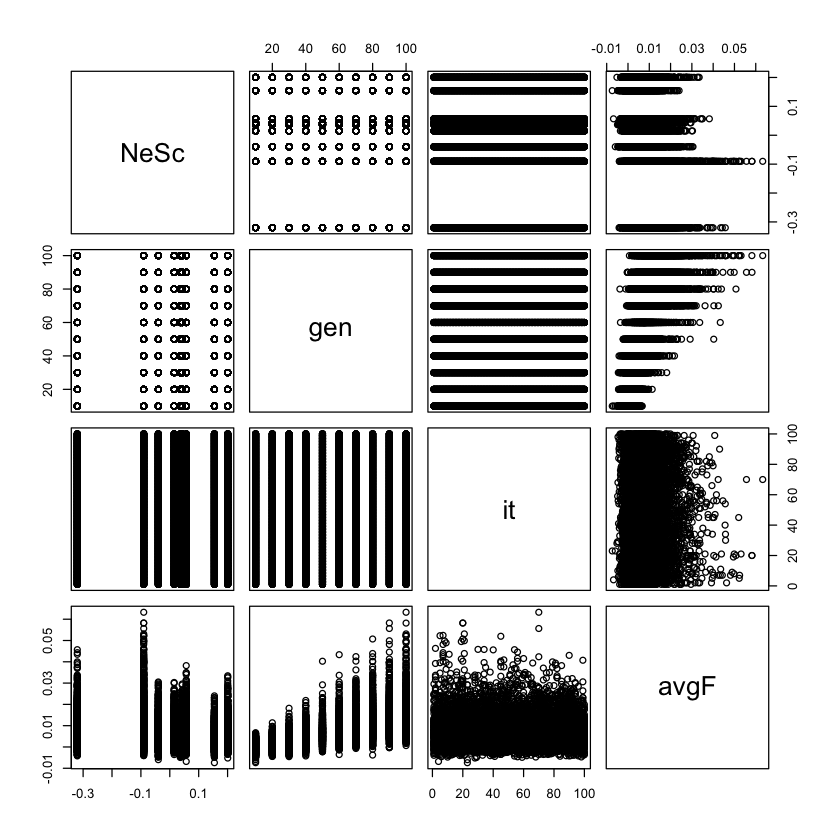

In [2]:
pairs((fdat))

In [3]:
# Ok, they look terrible... now I suppose we try GLS to model the var
require(nlme)

Loading required package: nlme



In [ ]:
glm.mod1 = gls(avgF ~ NeSc + gen, data = fdat)
#summary(glm.mod1)
vfix = varFixed(~ gen)
fit.var = gls(avgF ~ NeSc + gen, data = fdat, weights = vfix)
summary(fit.var)

In [6]:
glm.mod1 = gls(avgF ~ NeSc + gen, data = fdat)
#summary(lm.mod1)
#plot(lm.mod1)

In [ ]:
vfix2=varFixed(~NeSc)
fit.var2=gls(avgF~NeSc+gen, data=fdat, weights=vfix2)
summary(fit.var2)

In [ ]:
# Finding best model fit
NES=gls(avgF~log1p(NeSc)+gen, data=fdat)
GEN=gls(avgF~NeSc+log(gen),data=fdat)
GEN2=gls(avgF~NeSc+log1p(gen),data=fdat)
NEST=gls(avgF~log1p(NeSc)+log(gen),data=fdat)
Both=gls(avgF~log1p(NeSc)+log1p(gen), data=fdat)
NESTw=gls(avgF~log1p(NeSc)+log(gen),weights=varFixed(~gen), data=fdat)
NESTw2=gls(avgF~log1p(NeSc)+log(gen), weight=varFixed(~NeSc),data=fdat)
sqgen=gls(avgF~NeSc+sqrt(gen),data=fdat)
arcne=gls(avgF~asin(NeSc)+gen, data=fdat)
nesc1p=gls(avgF~log1p(NeSc)+gen, weights =varFixed(~NeSc), data=fdat)

In [ ]:
anova(fit.var, glm.mod1, lm.mod1, fit.var2, NES, GEN, GEN2, NEST, Both,Multw, NESTw,NESTw2,sqgen,arcne, nesc1p)

In [7]:
### plot(resid(glm.mod1)~fitted(glm.mod1))
#plot(glm.mod1)
vfix.mod2 = varPower(form= ~ gen)
vfix.mod2.1 = varExp(form= ~ gen)
gls.mod2 = gls(avgF ~ NeSc + gen, data = fdat, weights = vfix.mod2)
gls.mod2.1 = gls(avgF ~ NeSc + gen, data = fdat, weights = vfix.mod2.1)
#plot(gls.mod2)
#plot(gls.mod2.1)
#plot(resid(gls.mod2, type="normalized")~fitted(gls.mod2))
#plot(resid(gls.mod2.1, type="normalized")~fitted(gls.mod2.1))
summary(gls.mod2)

Generalized least squares fit by REML
  Model: avgF ~ NeSc + gen 
  Data: fdat 
        AIC      BIC   logLik
  -71560.72 -71525.2 35785.36

Variance function:
 Structure: Power of variance covariate
 Formula: ~gen 
 Parameter estimates:
   power 
0.616262 

Coefficients:
                   Value    Std.Error   t-value p-value
(Intercept) -0.001443596 5.979847e-05 -24.14102       0
NeSc        -0.003737088 2.691979e-04 -13.88230       0
gen          0.000169387 1.546050e-06 109.56119       0

 Correlation: 
     (Intr) NeSc  
NeSc -0.028       
gen  -0.767  0.000

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-3.9585089 -0.6684297 -0.1183794  0.5224428  6.8410301 

Residual standard error: 0.0004316179 
Degrees of freedom: 9000 total; 8997 residual

In [38]:
suppressWarnings(require(ggplot2))

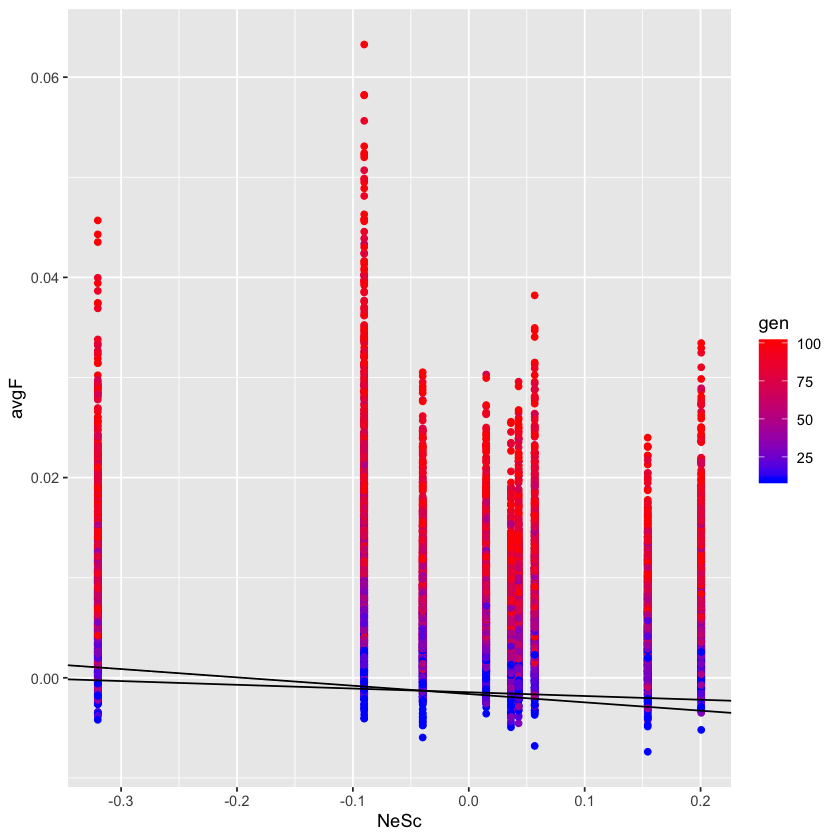

In [36]:
p = suppressWarnings((ggplot(data = fdat, aes(x= NeSc, y = avgF)) + geom_point(aes(color = gen)) + geom_abline(intercept=-.001443596, slope=-.003737088, aes(color = "blue", linetype = "dashed")) + scale_color_gradient(low="blue", high="red") + geom_abline(intercept= -.001614493, slope=-.008337485, aes(color="green"))))
suppressWarnings(p)

In [37]:
suppressWarnings(require(plotly))

In [11]:
#plot_ly(data = fdat, x = ~gen, y = ~NeSc, z = ~avgF, type="scatter3d")
#Run this in a terminal with teh data loaded

2. These data are built into R as a dataset called “trees”. We worked with these data during some of the multiple regression class lectures.

    - First, fit the best model to these data that explains the dependence of tree volume on tree girth and height. I did a lot of this in class so this part is the warm-up for the rest of the question (also the parameter values will be useful to you below).
    


   - Now, I would like to conduct this analysis using your handwritten likelihood ap- proach like we did in class and lab on regression likelihood. This will be a little more complicated that the class example. In class we fit a 3 parameter model (intercept, slope associated with one variable, residual standard deviation). When including two predictors, solving this problem requires 4 parameters: Int, Slope1, Slope2, SD of resid- uals. You will have to adjust the likelihood objective function and the call to optim to make this work.
    
        Using these two functions (the one we made in class and the new one that you created based on the hints above) compare the likelihoods and AIC between two models: both height and girth predicting volume and just girth predicting volume. Is there support for retaining height in the model?

- When Height and Girth are Zero, Volume should be Zero based on first principles. Create a third objective function that fits a model that constrains the intercept to 0: Vol = 0+b1 ×Girth+b2 ×Height+εi. Remember that this model drops back to 3 parameters (no longer estimating the intercept, requiring it to be 0)

    Test this last model against the other model with two predictors that you fit. Is this new one a better model? Why or why not?

## More Complex ANOVA designs

- Cetacean data (“cetacean-nested.txt”): In this dataset, individual animals of approx- imately the same size from 3 species were aged by examining different teeth three separate times.
     1. Test the hypothesis that the ages are the same across species. Make sure to take into account that there are multiple individuals nested in each species and there are multiple measurements per individual.
     2. Estimate the proportion of variance explained by each level in this design
     3. Does size explain age well in these species (remember each animal regardless of species was the same size)?
    
    Don’t forget that there may be numerically encoded variables that need to be treated as factors.

## Combining Categorical and Continuous Data
The following question depends on the clover.csv dataset. This dataset measures the effect
of Yarrow (a weed) density (stems per quadrat) on clover yield in three different areas. Use ANCOVA to assess if the relationship between yarrow and clover depends on the site at which data are collected.

In [ ]:
irish = read.csv("clover.csv")
summary(irish)
head(irish)

In [ ]:
irish.anc = lm((clover)~(Yarrow)*Area, data = irish)
summary(irish.anc)
plot((irish.anc))
plot(density(irish.anc$residuals))

## Frequencies
1. Construct a test that can determine whether the following three datasets are in Hardy-Weinberg equilibrium: The expected values have to come from the HWE, p<sup>2</sup> + 2pq + (1 − p)<sup>2</sup> . Use the best behaved test possible. Remember that when you estimate ’p’ from the observed genotypic data, you are estimating a parameter, so you should adjust df accordingly.

        (a) AA: 38, Aa: 100, aa: 48 
    
        (b) AA: 51, Aa: 84, aa: 65
    
        (c) AA: 15, Aa: 21, aa: 9

2. Here are some (depressing) data on modes of suicide in the US in the year 1992. Test whether there is an association between gender and the choice of suicide method. The sample sizes are large in this example and it may only be possible to use the test-statistic approach rather than directly estimating probabilities with Fisher’s test.

![alt-text](./freq_tab.png)